In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np

In [23]:
dataset = pd.read_csv('dataset.csv')
X = pd.DataFrame(dataset)
dataset.head()
X

,age,income
0,22,28
1,25,26
2,47,68
3,52,70
4,46,65
5,23,22
6,55,62
7,60,73
8,62,75
9,21,25


In [51]:
# Build the K Means Model
model_K = KMeans(n_clusters=3)
model_K.fit(X) 
model_K.labels_=model_K.fit_predict(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [52]:
# # Visualise the clustering results
plt.figure(figsize=(14,14))
colormap = np.array(['red', 'lime', 'black'])

<Figure size 1400x1400 with 0 Axes>

Text(0, 0.5, 'income')

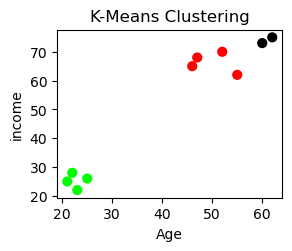

In [53]:
# Plot the Models Classifications
plt.subplot(2, 2, 2)
plt.scatter(X.age, X.income, c=colormap[model_K.labels_], s=40)
plt.title('K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('income')

In [48]:
model_ag = AgglomerativeClustering(n_clusters=3) 
model_ag.fit(X) 
model_ag.labels_=model_K.fit_predict(X)

Text(0, 0.5, 'income')

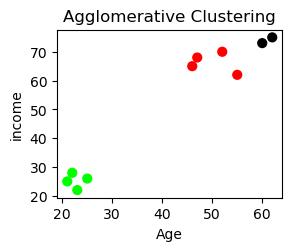

In [49]:
# Plot the Models Classifications
plt.subplot(2, 2, 2)
plt.scatter(X.age, X.income, c=colormap[model_ag.labels_], s=40)
plt.title('Agglomerative Clustering')
plt.xlabel('Age')
plt.ylabel('income')

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


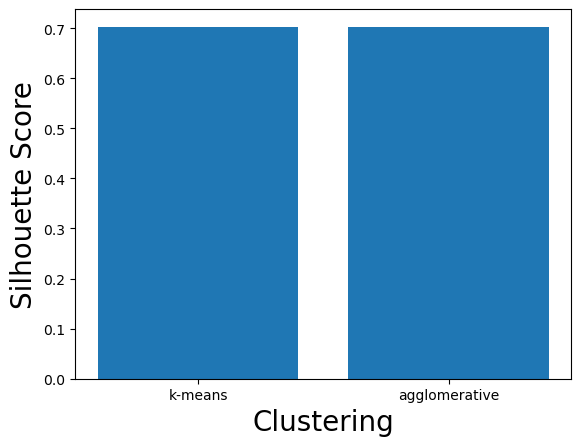

[0.7027985111088989, 0.7027985111088989]

In [54]:
k=['k-means','agglomerative']
# Appending the silhouette scores of the different models to the list 
silhouette_scores = [] 
silhouette_scores.append( 
        silhouette_score(X, model_K.fit_predict(X))) 
silhouette_scores.append( 
        silhouette_score(X, model_ag.fit_predict(X))) 
  
# Plotting a bar graph to compare the results 
plt.bar(k, silhouette_scores) 
plt.xlabel('Clustering', fontsize = 20) 
plt.ylabel('Silhouette Score', fontsize = 20) 
plt.show() 
silhouette_scores